# Demo

Some examples below are shown to showcase some of the functionality of ``swtools``. 

1) [*Basic functionality*](#basic)
  * [Help](#help)
  * [Extract parameter from file(s)](#extract)
  * [Modify parameter](#modify)
  * [Quick introspection](#introspection)
  * [Plot parameter(s)](#plot)
  * [Unzip file and extract contents](#unzip)

2) [*FTP-server*](#FTP)
  * [Download file(s) from ftp server and extract contents](#download)
  * [Filter ftp-server vs. interactive selection](#filter-inter)

3) [*Delay of parameter*](#delay) 
  * [Shift a parameter wrt. time](#shift)
  * [Align two parameters wrt. time](#align)

4) [*Visualization*](#Visualization)

5) [*Spherical harmonics*](#harmonics)

6) [*Miscellaneous*](#misc)
  * [Fourier transform](#fourier)
  * [Read sp3 files](#sp3)
  * [EFI provisional](#provisional)
  * [Parameter](#parameter)

<!--
## [Test use cases (Visualization)](#vis)

1. Plots of $F(t)$, $B_{VFM}(t)$ & spectras of same quantity
2. Geographical plots of ACC & ACC time series
3. Plots of FAC
4. Geographical plots of LP $n_e(\texttt{lat,long})\,$ or $\,n_e(\texttt{lat,t})$
5. Plots of spherical harmonic models 
-->

<a id="basic">

## Basic functionality

In [1]:
%matplotlib inline 
import swtools
import numpy as np
import matplotlib.pyplot as plt

</a><a id="help"></a>

### Help

In [2]:
#using the built-in help function:
#help(swtools.getCDFparams)

In [3]:
#if using ipython or the jupyter notebook you can also use:
#swtools.getCDFlist?

In [4]:
#to find names of functions in the jupyter notebook one can tab(to auto-complete)
#swtools. #tab to find avalable functions and submodules

<a id='extract'></a>

In [5]:
#change this to target your sample data directory
sample_loc = "sample_files/"

#cleanup of directory:
import os
with open(os.path.join(sample_loc,'sample_files.txt'),'r') as f:
    samplefiles=[line.strip() for line in f]
    for fn in os.listdir(sample_loc):
        if fn not in samplefiles:
            f_del = os.path.join(sample_loc,fn)
            if os.path.isfile(f_del):
                print('Removing {}'.format(f_del))
                os.remove(f_del)

### Extract parameter from file(s)

In [6]:
#check content of directory:
%ls sample_files/

IGRF12.shc        SW_OPER_EEFATMS_2F_20150924T010219_20150924T225420_0101.ZIP
sample_files.txt  SW_OPER_EEFATMS_2F_20151101T002034_20151101T221233_0101.DBL
sample_kin.txt    SW_OPER_EEFATMS_2F_20151101T234509_20151102T230946_0101.DBL
sample_rd.txt     SW_PREL_EFIA_LP_1B_20150720T000000_20150720T235959_0103.txt


In [7]:
#a cdf file with the EEF product
filepath_EEF_1 = os.path.join(sample_loc,'SW_OPER_EEFATMS_2F_20151101T002034_20151101T221233_0101.DBL') 
filepath_EEF_2 = os.path.join(sample_loc,'SW_OPER_EEFATMS_2F_20151101T234509_20151102T230946_0101.DBL')

#get EEF and timestamp parameter from file
EEF_1v,EEF_1t,EEF_1lon,EEF_1lat = swtools.getCDFparams(
    filepath_EEF_1,'EEF','Timestamp','longitude','latitude') 
print('Parameter: {}, units: {}\nValues:\n{}'
      .format(EEF_1v.name,EEF_1v.unit,EEF_1v.values),end='\n\n')
print('Parameter: {}, units: {}\n(some) Values:\n{}'
      .format(EEF_1t.name,EEF_1t.unit,EEF_1t.values[::3]))

Parameter: EEF, units: V/m
Values:
[ 0.00075635  0.00079489  0.00089461  0.00053112  0.00052239  0.00046283
  0.00051985  0.00052364  0.0001264   0.00014414  0.00047001  0.0003849
  0.00022549  0.00032556  0.00060109]

Parameter: timestamp, units: ms
(some) Values:
[datetime.datetime(2015, 11, 1, 0, 20, 35)
 datetime.datetime(2015, 11, 1, 5, 1, 5)
 datetime.datetime(2015, 11, 1, 9, 41, 19)
 datetime.datetime(2015, 11, 1, 14, 25, 30)
 datetime.datetime(2015, 11, 1, 19, 6, 57)]


In [8]:
#Filepaths could also be fetched using:
filepaths=swtools.getCDFlist(sample_loc) #get list of cdf files in given path

#extract data from both files, concatenate output 
EEF_v = swtools.getCDFparams(filepaths,'EEF') 
print('Parameter: {}, units: {}\nValues:\n{}'
      .format(EEF_v.name,EEF_v.unit,EEF_v.values),end='\n\n')


Parameter: EEF, units: V/m
Values:
[  7.00498985e-04   9.01116361e-04   7.36308457e-04   4.64592435e-04
   1.30656022e-04   3.22021823e-04   2.45098928e-04   7.35052777e-04
   3.94823967e-04   2.35773796e-04   7.26535923e-05   3.71083663e-04
   3.81770806e-04   4.53130172e-04   6.55204879e-04   4.98714429e-04
   7.56350563e-04   7.94891659e-04   8.94613963e-04   5.31117096e-04
   5.22392922e-04   4.62829641e-04   5.19851551e-04   5.23644858e-04
   1.26398980e-04   1.44138771e-04   4.70008573e-04   3.84904014e-04
   2.25494527e-04   3.25563471e-04   6.01092434e-04]



These functions by default do not evaluate zip files unless there are no cdf files available or the keyword argument `includezip=True` is passed.
If `getCDFparams` is passed with `cat=False`, values will be a list of `numpy.ndarrays`.

In [9]:
EEF_v_no_cat,EEF_t_no_cat = swtools.getCDFparams(filepaths,'EEF','Timestamp',cat=False)
print(EEF_v_no_cat.values[0],'\n\n',EEF_v_no_cat.values[1])

[  7.00498985e-04   9.01116361e-04   7.36308457e-04   4.64592435e-04
   1.30656022e-04   3.22021823e-04   2.45098928e-04   7.35052777e-04
   3.94823967e-04   2.35773796e-04   7.26535923e-05   3.71083663e-04
   3.81770806e-04   4.53130172e-04   6.55204879e-04   4.98714429e-04] 

 [ 0.00075635  0.00079489  0.00089461  0.00053112  0.00052239  0.00046283
  0.00051985  0.00052364  0.0001264   0.00014414  0.00047001  0.0003849
  0.00022549  0.00032556  0.00060109]


<a id='modify'></a>

### Modify parameter
The `values`-attribute is a `numpy.ndarray`, and can thus be freely manipulated.

In [10]:
from numpy import sqrt,sin,log

#mathematical operations performed on the EEF array
derived_value=log(sqrt(sin(1/EEF_v.values)+1.5))**5
print(derived_value,sum(derived_value))

#cut of last value:
EEF_v_no_cat.values[1] = EEF_v_no_cat.values[1][:len(EEF_v_no_cat.values[0])]
EEF_t_no_cat.values[1] = EEF_t_no_cat.values[1][:len(EEF_t_no_cat.values[0])]
print(len(EEF_v_no_cat.values[1]))

[  1.82749839e-02  -1.06637542e-05   1.31339427e-02   8.53674901e-08
   9.31970019e-03   2.00267304e-02   1.28465818e-02   8.95627325e-05
   7.15463630e-03   1.32895036e-03  -1.91147298e-07  -1.38418147e-06
  -4.40133687e-06   1.99759498e-02  -5.05632702e-09   1.03906124e-02
   4.22996807e-03   1.95200880e-02  -6.25422744e-08  -4.37908741e-04
  -5.66711317e-04  -2.45336690e-05   1.33836316e-02   4.44420517e-07
   1.25004456e-02   1.61089665e-02  -1.32752877e-05   4.93340211e-04
  -2.14293773e-03  -9.79609775e-05  -4.11192061e-03] 0.171366663925
15


<a id='introspection'></a>

### Quick introspection
#### of parameter names
One can quickly look at the parameter names of a cdf file (or several files simultaneously):

In [11]:
swtools.getCDFparamlist(filepaths)

INFO	
List of parameters for file 'SW_OPER_EEFATMS_2F_20151101T234509_20151102T230946_0101.DBL':
	timestamp
	longitude
	latitude
	EEF
	RelErr
	flags


Only one file will be shown for every unique product (based on filename).

#### of parameter values
`param_peek` can be used to get a quick idea of the content within either a parameter in a file or an array. Note that it behaves differently depending on the dimension of the values. This only works if the parameter is represented by floats (eg. not `datetime.datetime` objects)

In [12]:
#from filename
swtools.param_peek(filepath_EEF_1,'EEF')

INFO	Array of 'EEF',	units: 'V/m'
	shape: (15,)
	max: 0.000895,	min: 0.000126,	mean: 0.000486,	median: 0.000520,	stddev: 0.000217
	first and last 5 variable(s):
	 0:   0.000756
	 1:   0.000795
	 2:   0.000895
	 3:   0.000531
	 4:   0.000522
	-5:   0.000470
	-4:   0.000385
	-3:   0.000225
	-2:   0.000326
	-1:   0.000601
	Zeros:     0	Fraction zero values: 0.0
	NaN's:     0	Fraction NaN values:  0.0
	Largest jump over 1 index[along axis=0]:   0.000397


In [13]:
EEF_v_no_cat() #The value array can be accessed also by calling the parameter object

[array([  7.00498985e-04,   9.01116361e-04,   7.36308457e-04,
          4.64592435e-04,   1.30656022e-04,   3.22021823e-04,
          2.45098928e-04,   7.35052777e-04,   3.94823967e-04,
          2.35773796e-04,   7.26535923e-05,   3.71083663e-04,
          3.81770806e-04,   4.53130172e-04,   6.55204879e-04,
          4.98714429e-04]),
 array([ 0.00075635,  0.00079489,  0.00089461,  0.00053112,  0.00052239,
         0.00046283,  0.00051985,  0.00052364,  0.0001264 ,  0.00014414,
         0.00047001,  0.0003849 ,  0.00022549,  0.00032556,  0.00060109])]

In [14]:
#15x2 array
a=np.column_stack((EEF_v_no_cat.values[0][:-1],EEF_v_no_cat.values[1]))
swtools.param_peek(a,axis=1)

INFO	shape: (15, 2)
	1/2	max: 0.000901,	min: 0.000073,	mean: 0.000453,	median: 0.000395,	stddev: 0.000236
	2/2	max: 0.000895,	min: 0.000126,	mean: 0.000486,	median: 0.000520,	stddev: 0.000217
	Zeros:     0	Fraction zero values: 0.0
	NaN's:     0	Fraction NaN values:  0.0
	Largest jump over 1 index[along axis=1]:   0.000397


#### of discontinuities in values

In [15]:
#find jumps in values:

#jump larger than difference between 25th and 75 percentile
jumps_pcnt=swtools.where_diff(a[:,0])

#relative difference of 50%
jumps_rtol=swtools.where_diff(a[:,0],rtol=0.5)

#absolute difference
jumps_atol=swtools.where_diff(a[:,0],atol=0.0004)

#abs_tol ∩ rel_tol
jumps_comb=swtools.where_diff(a[:,0],atol=0.0004,rtol=0.5)

print(jumps_pcnt,a[jumps_pcnt,0])
print(jumps_rtol,a[jumps_rtol,0])
print(jumps_atol,a[jumps_atol,0])
print(jumps_comb,a[jumps_comb,0])

(array([7]),) [[ 0.00073505]]
(array([ 3,  4,  5,  7,  8,  9, 10, 11]),) [[  4.64592435e-04   1.30656022e-04   3.22021823e-04   7.35052777e-04
    3.94823967e-04   2.35773796e-04   7.26535923e-05   3.71083663e-04]]
(array([7]),) [[ 0.00073505]]
(array([7]),) [[ 0.00073505]]


<a id='plot'></a>

### Plot parameter(s)

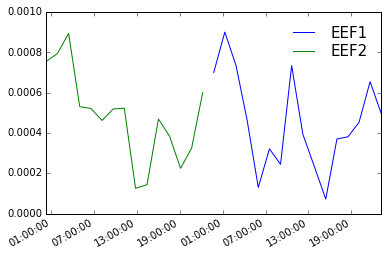

In [16]:
fig,ax=swtools.plot_basic(EEF_t_no_cat.values[0],EEF_v_no_cat.values[0],
                          EEF_t_no_cat.values[1],EEF_v_no_cat.values[1],
                          legends=[EEF_1v.name+'1',EEF_1v.name+'2'])


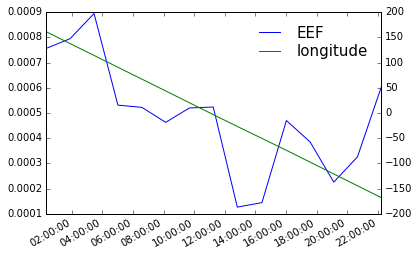

In [17]:
#plot EEF(t) and longitude(t) with own unique y-axis
fig,ax1=swtools.plot_basic(EEF_1t.values,EEF_1v.values,
                           legends=[EEF_1v.name],lhide=True)
ax2=swtools.plot_twinx(EEF_1t.values,EEF_1lon.values,ax=ax1,
                       legends=[EEF_1lon.name])


<a id='unzip'></a>

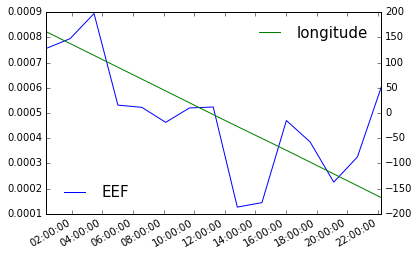

In [18]:
#plot EEF(t) and longitude(t) with own unique y-axis and legend position:
fig,ax1=swtools.plot_basic(EEF_1t.values,EEF_1v.values,
                           legends=[EEF_1v.name,'a'],lloc='lower left')
ax2=swtools.plot_twinx(EEF_1t.values,EEF_1lon.values,ax=ax1,
                       legends=[EEF_1lon.name],lall=False)


### Unzip file and extract contents
To unzip a cdf file and extract parameter from file, simply use the same syntax as for a normal file. Additionally, one can store the cdf temporarily by specifying `temp=True`:

In [19]:
#include zipfile in search for cdf files- unzip it in temporary storage, 
#then filter files based on satelite and within time range based on filename
filepaths_w_zip=swtools.getCDFlist(sample_loc,includezip=True,temp=True,
                                   sat='A',start_t='20150901',end_t='20151001')

In [20]:
filepaths_w_zip

['/tmp/swtools_99thpjbk/SW_OPER_EEFATMS_2F_20150924T010219_20150924T225420_0101.DBL']

In [21]:
EEF_zip=swtools.getCDFparams(
    os.path.join(sample_loc,'SW_OPER_EEFATMS_2F_20150924T010219_20150924T225420_0101.ZIP'),
    'EEF',temp=True)

<a id='FTP'></a><a id="download"></a>

## FTP-server
### Download file(s) from ftp server and extract contents
Extracting from ftp server follows same syntax. output location is by default the current working directory, by may be specified. `filter_param` will ensure that only folders where the parameter is presumed to be will be checked (as of `swtools 1.0.2` only main `MAG`, `EFI`, `IBI`, `FAC`, `TEC` and `EEF` products are supported for filtering, and only for the dissemination server `swarm-diss.eo.esa.int`):

**NOTE: If experiencing difficulties connecting to the dissemination server from a secure ESA network, the problem may be resolved by adding `use_passive_mode=False` and possibly also temporarily deactivating your firewall.**

In [22]:
url,user,pw='swarm-diss.eo.esa.int/','myuser','mypw'
#get files with parameter 'n'(ie. EFI product) from satellite B, 
#within two days after 1.9.2015, download to current directory

#swtools.getCDFparams(url+'Level1b/','n',user=user,pw=pw,outloc=sample_loc,
#                     filter_param=True,sat='B',start_t='20150901',duration=2)

<a id='filter'></a>

### Filter ftp-server vs. interactive selection
In the above example no interaction is needed, as everything is specified.
If not all filters are used, the user can select files/directories interactively:

In [23]:
#look for products from satellite B  with parameter 'timestamp'
#swtools.getCDFparams(url,'Timestamp',user=user,pw=pw,outloc=sample_loc,sat='B') 

<a id='delay'></a>

## Delay of parameter
### Shift a parameter wrt. time

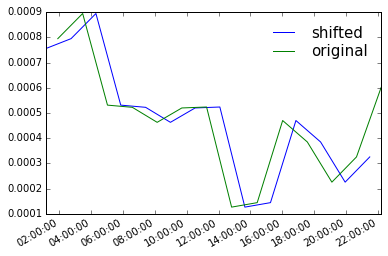

In [24]:
#shift a parameter with respect to itself 10000s(for illustration purposes)
eef1,eef2,eeft1,eeft2=swtools.shift_param(
    EEF_1v.values,EEF_1v.values,EEF_1t.values,EEF_1t.values,delta_t=3000,k=1)
fig,ax=swtools.plot_basic(eeft1,eef1,eeft2,eef2,legends=['shifted','original'])


It is also possible to make the function shift into a best fit using `auto=True`.

In [25]:
#Shift to best fit (which should shift eef1 back to initial position), and
#find the "unknown" shift assumed to be +-10000s from present position. 
#`ext=0` due to large errors, so the solver starts to try to extrapolate 
#otherwise
eef1_,eef2_,eeft1_,eeft2_=swtools.shift_param(eef1,eef2,eeft1,eeft2,
                                              dt_lim=[-10000,10000],
                                              auto=True,ext=0)

INFO	delta_t converged to solution near lower limit, consider rerunning with new limits
INFO	output delta_t: -2908.2535406263496


Here due to using very few points(EEF has ~15 values/day) the error is large, and interpolation poor, and a warning is shown; but the original value was approximately regained. More detailed output can be gained from `v=2` and `show=True`:

FCN = 9.83170543087182e-11 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 1.0086714701026634e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,dt_candidate,-2908.25,16194.2,0,0,-10000.0,10000.0,


Error,-7091.74645937365,12908.253540626349
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


INFO	delta_t converged to solution near lower limit, consider rerunning with new limits
INFO	output delta_t: -2908.2535406263496


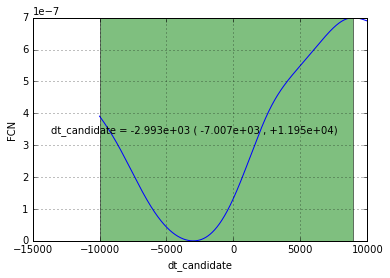

In [26]:
eef1_,eef2_,eeft1_,eeft2_=swtools.shift_param(
    eef1,eef2,eeft1,eeft2,dt_lim=[-10000,10000],
    auto=True,ext=0,v=2,show=True)

<a id='align'></a>

(<matplotlib.figure.Figure at 0x7f1ad894ff60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ad886d6a0>)

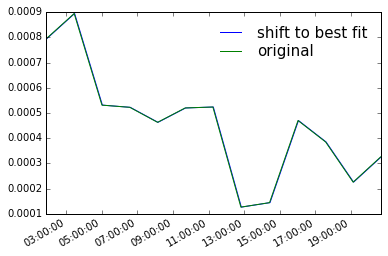

In [27]:
#best fit:
swtools.plot_basic(eeft1_,eef1_,eeft2_,eef2_,legends=['shift to best fit','original'])

### Align two parameters wrt. time
If we want to plot to parameters with different frequencies together(downsample one of them), we can use `align_param`:

(<matplotlib.figure.Figure at 0x7f1ad87a6748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1ad8692160>)

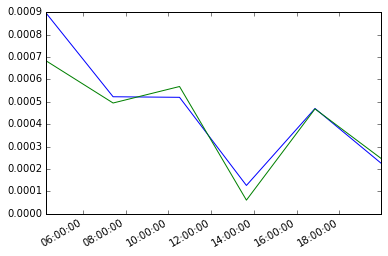

In [28]:
#plot shifted values, where one has half the frequency of the other:
eef1_a,eef2_a,eeft=swtools.align_param(eef1[::2],eef2,eeft1[::2],eeft2)
swtools.plot_basic(eeft,eef1_a,eeft,eef2_a)

#one could use plot_align(eef1[::2],eef2,eeft1[::2],eeft2) 
#if not interested in the output values(only the visualization)

<a id='visualization'></a>

## Visualization
Visualize on the globe

(-180, 180)

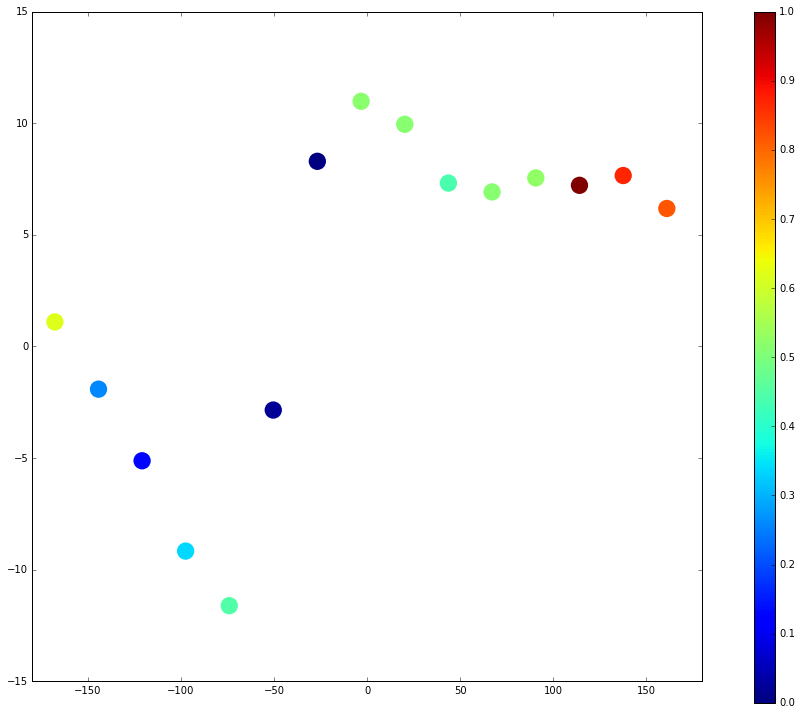

In [29]:
#plain scatter plot with no background
fig,ax=swtools.plot_scatter(EEF_1lon.values,EEF_1lat.values,EEF_1v.values,
                            s=300,figsize=(12,12))
ax.set_xlim([-180,180])

(<matplotlib.figure.Figure at 0x7f1b00170320>,
 <mpl_toolkits.basemap.Basemap at 0x7f1ad871aef0>)

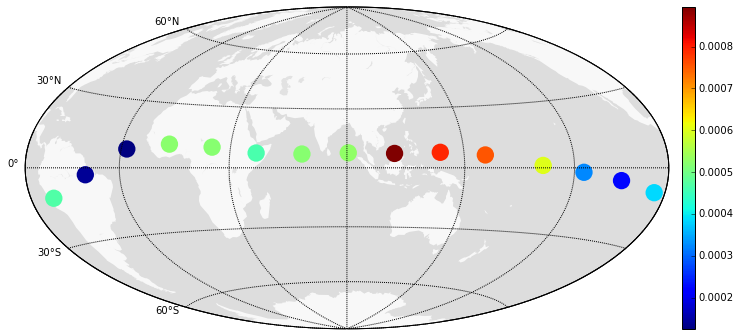

In [30]:
#scatter on hammer projection centered on longitude=90
swtools.plot_geo(EEF_1lon.values,EEF_1lat.values,EEF_1v.values,
                 s=300,projection='hammer',lon_0=90,figsize=(12,12))

(<matplotlib.figure.Figure at 0x7f1ad978f898>,
 <mpl_toolkits.basemap.Basemap at 0x7f1ad9784048>)

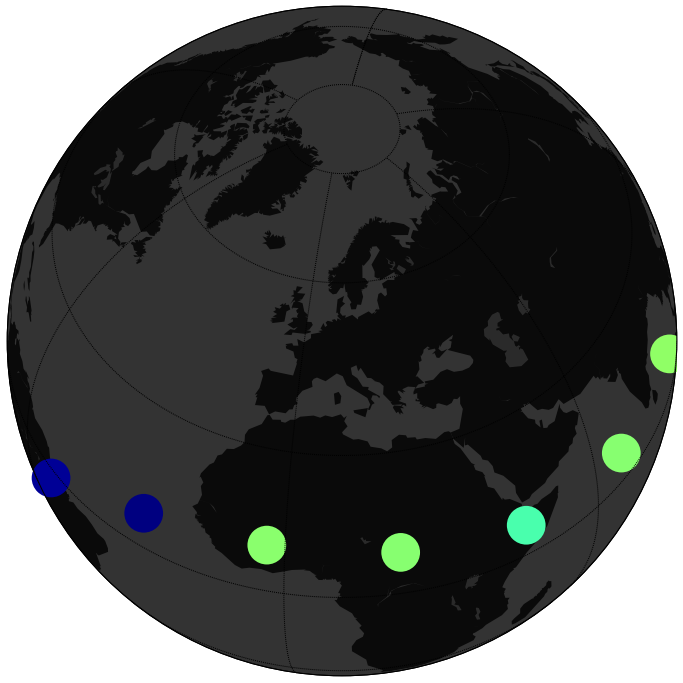

In [31]:
#Orthographic projection centered on (50° N,10° E) using dark map, 
#no colorbar and a figure size of 12x12 inches
swtools.plot_geo(EEF_1lon.values,EEF_1lat.values,EEF_1v.values,
                 s=1500,lon_0=10,lat_0=50,projection='ortho',
                 dark_map=True,cbar=False,figsize=(12,12))

(<matplotlib.figure.Figure at 0x7f1ad8aabbe0>,
 <mpl_toolkits.basemap.Basemap at 0x7f1ad8dd6b38>)

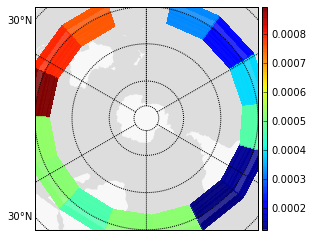

In [32]:
#need 2d array for colormesh, so here I just stack the EEF values on top of eachother, 
#essentially losing the latitude information.
EEF_band=np.column_stack([EEF_1v.values]*15).T
#colormesh on South-Polar Azimuthal Equidistant projection, 
#with the equator as bounding latitude
swtools.plot_geo(EEF_1lon.values,EEF_1lat.values,EEF_band,
                 ptype='colormesh',latlon=True,projection='spaeqd',boundinglat=0)

<a id='harmonics'></a>

## Spherical harmonics 

In [33]:
lon,lat=np.linspace(0,360,101),np.linspace(-90,90,101)
shc_fn=os.path.join(sample_loc+'IGRF12.shc')
Bnec=swtools.get_Bnec(shc_fn,lat,lon,h=100)
dBnec=swtools.get_Bnec(shc_fn,lat,lon,h=100,dB=True)


Number of time values: 25, Dimensions in B(fixed): 3,
Number of latitude values: 101, Number of longitude values: 101


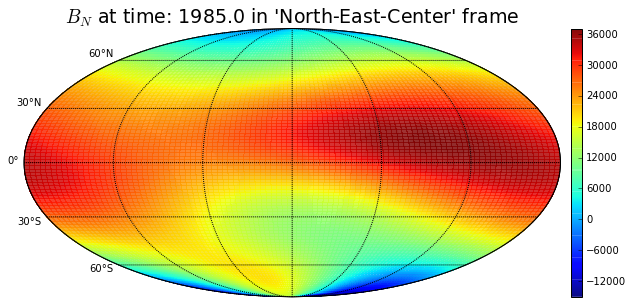

In [34]:
time_idx=17
dim_idx=0
print("Number of time values: {}, Dimensions in B(fixed): {},\n"
      .format(*Bnec.shape[:2]) + 
      "Number of latitude values: {}, Number of longitude values: {}"
      .format(*Bnec.shape[2:]))
fig,m=swtools.plot_geo(lon,lat,Bnec[time_idx][dim_idx],
                       ptype='colormesh',latlon=True,figsize=(10,10))

#can read data from shc file using `read_shc`:
plt.title("$B_{}$ at time: {} in 'North-East-Center' frame"
          .format('NEC'[dim_idx],swtools.read_shc(shc_fn)[-1][time_idx]),fontsize=19)
plt.show()

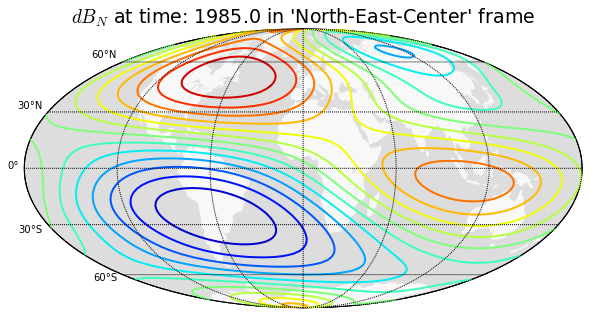

In [35]:
#same for its derivative
fig,m=swtools.plot_geo(lon,lat,dBnec[time_idx][dim_idx],
                       ptype='contour',latlon=True,figsize=(10,10),
                       linewidths=2,cbar=False)
plt.title("$dB_{}$ at time: {} in 'North-East-Center' frame"
          .format('NEC'[dim_idx],swtools.read_shc(shc_fn)[-1][time_idx]),fontsize=19)
plt.show()

<a id='misc'></a><a id="fourier"></a>

## Miscellaneous
### Fourier transform
Fourier transforms can be performed on data:

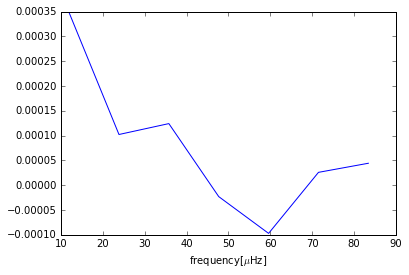

In [36]:
#Note that the input should have a fixed frequency
#unitary fourier transform off EEF values
fEEF,EEF_freq=swtools.fourier_transform(EEF_1v.values,EEF_1t.values,
                                        norm='ortho')
positive_freq=np.where(EEF_freq>0)
fig,ax=swtools.plot_basic(EEF_freq[positive_freq]*1e6,fEEF[positive_freq])
ax.set_xlabel('frequency[$\mu$Hz]')
plt.show()

<a id='sp3'></a>

### Read sp3 files

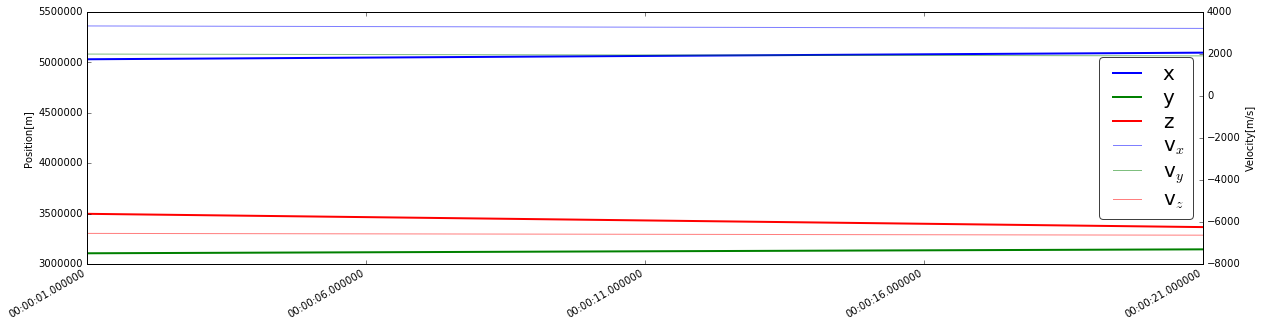

In [37]:
#x,y,z,t,header=swtools.read_sp3('sample_kin.txt',doctype=1)#read kinetic sp3 file
x,y,z,vx,vy,vz,dt,t,header=swtools.read_sp3(sample_loc+'sample_rd.txt')
fig,ax=swtools.plot_basic(t,x,t,y,t,z,legends=['x','y','z'],
                          figsize=(20,5),lhide=True,lw=2)
ax2=swtools.plot_twinx(t,vx,t,vy,t,vz,legends=['v$_x$','v$_y$','v$_z$'],
                       lfontsize=20,lbox=True,alpha=0.5,colors=['b','g','r'])
ax2.set_ylabel('Velocity[m/s]')
ax.set_ylabel('Position[m]')
plt.show()

<a id='provisional'></a>

### EFI provisional
Read the provisional EFI ascii files

In [38]:
#if no parameter specified, a dictionary of all parameters are returned
out=swtools.read_EFI_prov_txt(
    os.path.join(sample_loc,'SW_PREL_EFIA_LP_1B_20150720T000000_20150720T235959_0103.txt'))
print("Parameters available in provisional ascii file:\n\t"+'\n\t'.join(out.keys()))
print("first 5 values:",out['n'][:5])

Parameters available in provisional ascii file:
	longitude
	latitude
	radius
	u_sc
	flag
	n
	t_elec
	timestamp
first 5 values: [ 163151.  162957.  163151.  162957.]


<a id='parameter'></a>

### Parameter
When a parameter is returned from `swtools.extract_parameter` or `swtools.getCDFparams` it is an instance of the `Parameter` class.

In [39]:
EEF_1v

Parameter EEF V/m 
array([ 0.00075635,  0.00079489,  0.00089461,  0.00053112,  0.00052239,
        0.00046283,  0.00051985,  0.00052364,  0.0001264 ,  0.00014414,
        0.00047001,  0.0003849 ,  0.00022549,  0.00032556,  0.00060109])

In [40]:
#the instance has a `values`,`name` and `unit` attribute.
EEF_1v.values,EEF_1v.name,EEF_1v.unit

(array([ 0.00075635,  0.00079489,  0.00089461,  0.00053112,  0.00052239,
         0.00046283,  0.00051985,  0.00052364,  0.0001264 ,  0.00014414,
         0.00047001,  0.0003849 ,  0.00022549,  0.00032556,  0.00060109]),
 'EEF',
 'V/m')

In [41]:
#values can be accessed directly:
print(EEF_1v[:4])
#calling is shorthand for `.values`:
print(EEF_1v())

[ 0.00075635  0.00079489  0.00089461  0.00053112]
[ 0.00075635  0.00079489  0.00089461  0.00053112  0.00052239  0.00046283
  0.00051985  0.00052364  0.0001264   0.00014414  0.00047001  0.0003849
  0.00022549  0.00032556  0.00060109]
